In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("stock_data.csv")

print(data)


            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

R² Score: 0.9657205654279428
Mean Squared Error: 169.79136346707213


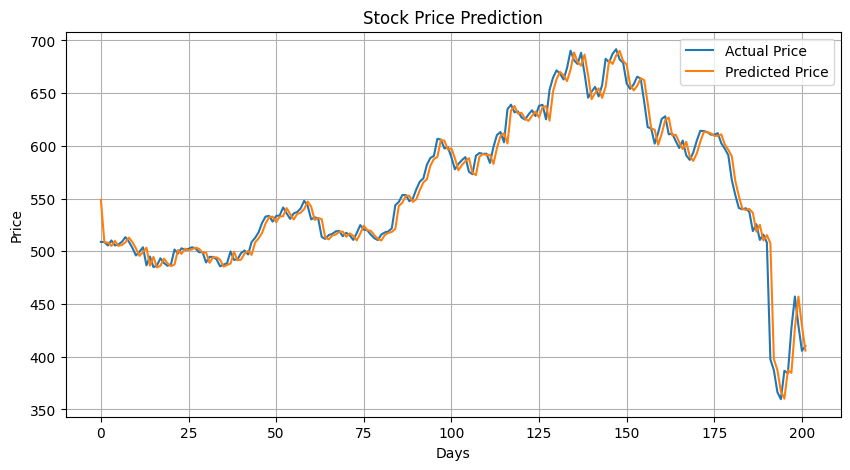

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data[['Close']].copy()
df['Target'] = df['Close'].shift(-1)  # Predict next day's close price
df.dropna(inplace=True)
X = df[['Close']]
y = df['Target']

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()